In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
def convert_datetime(df):
    
    df['Date_Hour'] = pd.to_datetime(df.Date) + pd.to_timedelta(df.Hour, unit='h')
    
    return df

In [3]:
df = pd.read_csv("data/ZonalDemands_2003-2017.csv")

df['Date'] = pd.to_datetime(df['Date'])
df = convert_datetime(df)

df.set_index('Date_Hour', inplace = True)

C:\Users\trevo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128616 entries, 2003-05-01 01:00:00 to 2018-01-01 00:00:00
Data columns (total 15 columns):
Date             128616 non-null datetime64[ns]
Hour             128616 non-null int64
Total Ontario    128616 non-null int64
Northwest        128616 non-null int64
Northeast        128616 non-null int64
Ottawa           128616 non-null int64
East             128616 non-null int64
Toronto          128616 non-null int64
Essa             128616 non-null int64
Bruce            128616 non-null int64
Southwest        128616 non-null int64
Niagara          128616 non-null int64
West             128616 non-null int64
Tot Zones        128616 non-null int64
diff             128616 non-null object
dtypes: datetime64[ns](1), int64(13), object(1)
memory usage: 15.7+ MB


In [5]:
df.head()

,Date,Hour,Total Ontario,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Tot Zones,diff
Date_Hour,,,,,,,,,,,,,,,
2003-05-01 01:00:00,2003-05-01,1,13702,809,1284,965,765,4422,622,41,2729,617,1611,13865,163
2003-05-01 02:00:00,2003-05-01,2,13578,825,1283,923,752,4340,602,43,2731,615,1564,13678,100
2003-05-01 03:00:00,2003-05-01,3,13411,834,1277,910,751,4281,591,45,2696,596,1553,13534,123
2003-05-01 04:00:00,2003-05-01,4,13501,835,1277,922,758,4281,599,41,2724,609,1544,13590,89
2003-05-01 05:00:00,2003-05-01,5,14010,847,1268,993,804,4469,643,51,2842,579,1592,14088,78


In [34]:
df.describe()

,Hour,Total Ontario,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Tot Zones,Day of Week,Month,Year
count,128616.000000,128616.000000,128616.000000,128616.000000,128616.000000,128616.000000,128616.000000,128616.000000,128616.000000,128616.000000,128616.000000,128616.000000,128616.000000,128616.000000,128616.000000,128616.000000
mean,12.500000,16418.643987,595.978331,1292.579166,1117.207564,1037.893862,5826.661271,936.600058,66.574695,3227.337547,554.323296,1720.206219,16375.369589,3.001120,6.612801,2010.156746
std,6.922213,2597.736561,174.372310,180.784294,296.211774,201.265013,1046.074486,209.713856,32.530097,506.964296,109.605621,324.497987,2590.754527,1.999914,3.429509,4.238396
min,1.000000,2270.000000,0.000000,-380.000000,0.000000,0.000000,0.000000,-91.000000,-769.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,1.000000,2003.000000
25%,6.750000,14475.000000,459.000000,1157.000000,898.000000,898.000000,5003.000000,784.000000,45.000000,2850.000000,481.000000,1481.000000,14457.000000,1.000000,4.000000,2006.000000
50%,12.500000,16345.000000,549.000000,1282.000000,1108.000000,1036.000000,5873.000000,932.000000,62.000000,3226.000000,545.000000,1682.000000,16307.000000,3.000000,7.000000,2010.000000
75%,18.250000,18203.000000,700.000000,1414.000000,1317.000000,1175.000000,6538.000000,1071.000000,85.000000,3573.000000,619.000000,1932.000000,18149.000000,5.000000,10.000000,2014.000000
max,24.000000,27005.000000,1149.000000,2026.000000,2508.000000,1783.000000,10285.000000,1899.000000,445.000000,5120.000000,1678.000000,3520.000000,26768.000000,6.000000,12.000000,2017.000000


Text(0,0.5,'MW')

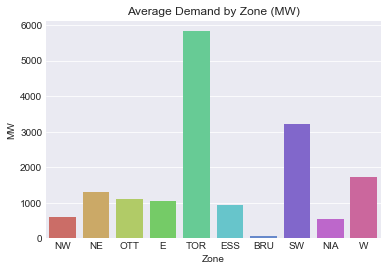

In [7]:
labels = np.array(['NW','NE','OTT','E','TOR','ESS','BRU','SW','NIA','W'])

sns.barplot(labels, df.iloc[:,3:13].mean(), palette = 'hls')
plt.title('Average Demand by Zone (MW)')
plt.xlabel('Zone')
plt.ylabel('MW')

Larget Consumers are Toronto, Southwest and West

In [8]:
#create day of week column
df['Day of Week'] = df['Date'].apply(lambda x: x.dayofweek)

#dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
#df['Day of Week'] = df['Day of Week'].map(dmap)

In [9]:
dayHour = df.groupby(by=['Day of Week','Hour']).max()['Total Ontario'].unstack()
dayHour

Hour,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
Day of Week,,,,,,,,,,,,,,,,,,,,,
0,18912,18427,18372,18345,18451,19151,20389,22312,23022,24302,...,25939,26092,26157,25718,24827,24381,24803,23679,21868,20232
1,19502,18879,18658,18635,18818,19353,21100,22920,24438,25602,...,26854,27005,26903,26401,25847,25476,25518,24220,22709,21353
2,20560,19883,19298,18949,19250,19949,21318,22589,23524,24162,...,26082,26160,25888,25704,24797,24080,23981,23112,21355,19963
3,19269,18934,18743,18681,18791,19497,20842,22813,23207,24266,...,25584,25539,25343,24996,24937,24869,24863,23600,21958,20781
4,19956,19519,19281,19160,19192,19765,21087,23020,23388,23394,...,24595,24793,24563,23995,24008,23671,23179,22484,21456,20247
5,19425,18966,18634,18486,18408,18594,19096,19824,20664,21597,...,22907,22645,22587,23029,23258,22731,22158,21469,20728,19687
6,18957,18574,18325,18218,18227,18487,18787,19203,19746,20295,...,22248,22478,22702,22856,23008,22695,22308,21816,20723,19535


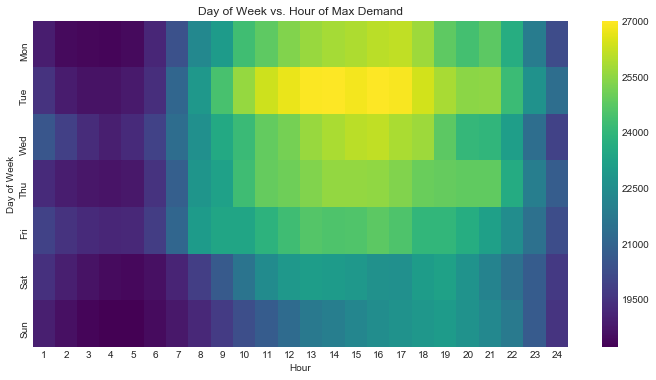

In [10]:
plt.figure(figsize=(12,6))
plt.title('Day of Week vs. Hour of Max Demand')
sns.heatmap(dayHour, cmap='viridis', yticklabels = ['Mon','Tue', 'Wed','Thu', 'Fri', 'Sat', 'Sun'])

Max peaks tenx to happen between 12-7pm on Tuesdays

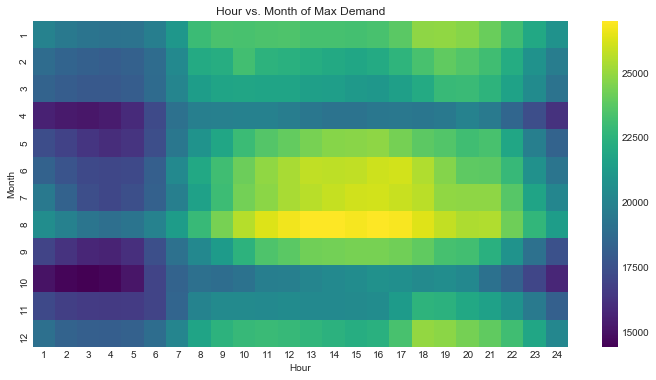

In [11]:
df['Month'] = df['Date'].apply(lambda x: x.month)
dayMonth = df.groupby(by=['Month','Hour']).max()['Total Ontario'].unstack()

plt.figure(figsize=(12,6))
plt.title('Hour vs. Month of Max Demand')
sns.heatmap(dayMonth, cmap='viridis')

Text(0.5,0,'Year')

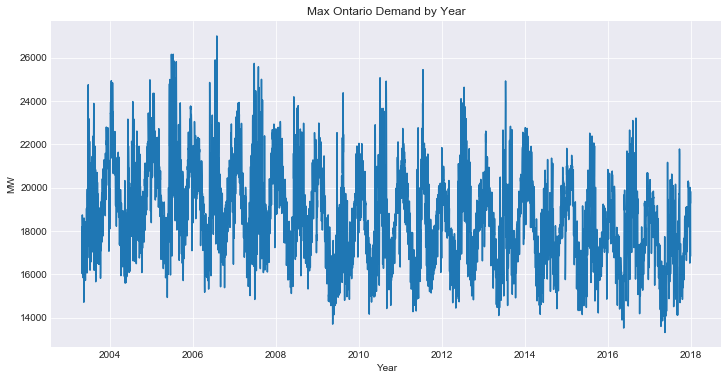

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df['Total Ontario'].resample('D').max())
plt.title('Max Ontario Demand by Year')
plt.ylabel('MW')
plt.xlabel('Year')

Slight downward trend, could be caused by implementation of GA in 2011

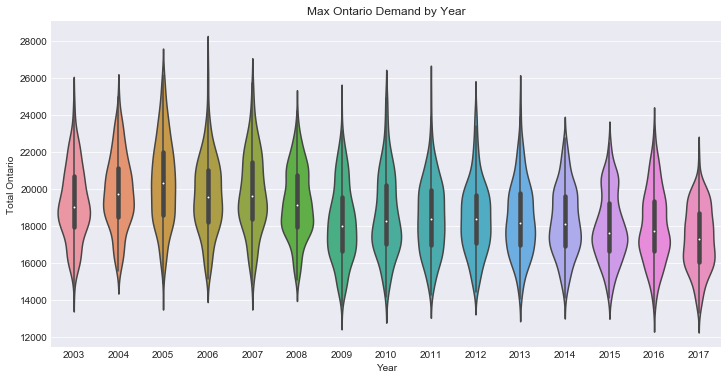

In [29]:
df['Year'] = df['Date'].apply(lambda x: x.year)

plt.figure(figsize=(12,6))
plt.title('Max Ontario Demand by Year')
sns.violinplot(x='Year', y='Total Ontario', data = df.resample('D').max())

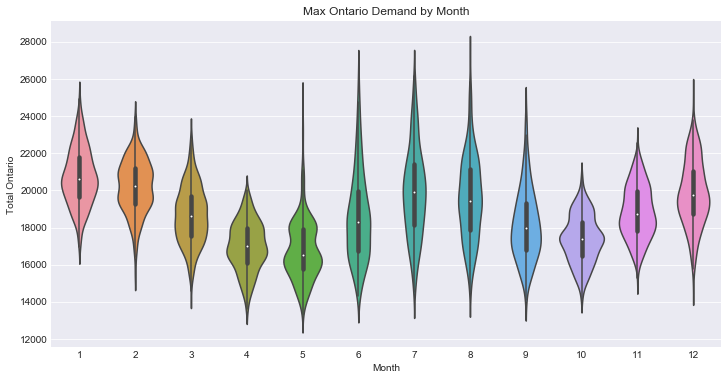

In [35]:
plt.figure(figsize=(12,6))
plt.title('Max Ontario Demand by Month')
sns.violinplot(x='Month', y='Total Ontario', data = df.resample('D').max())